,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


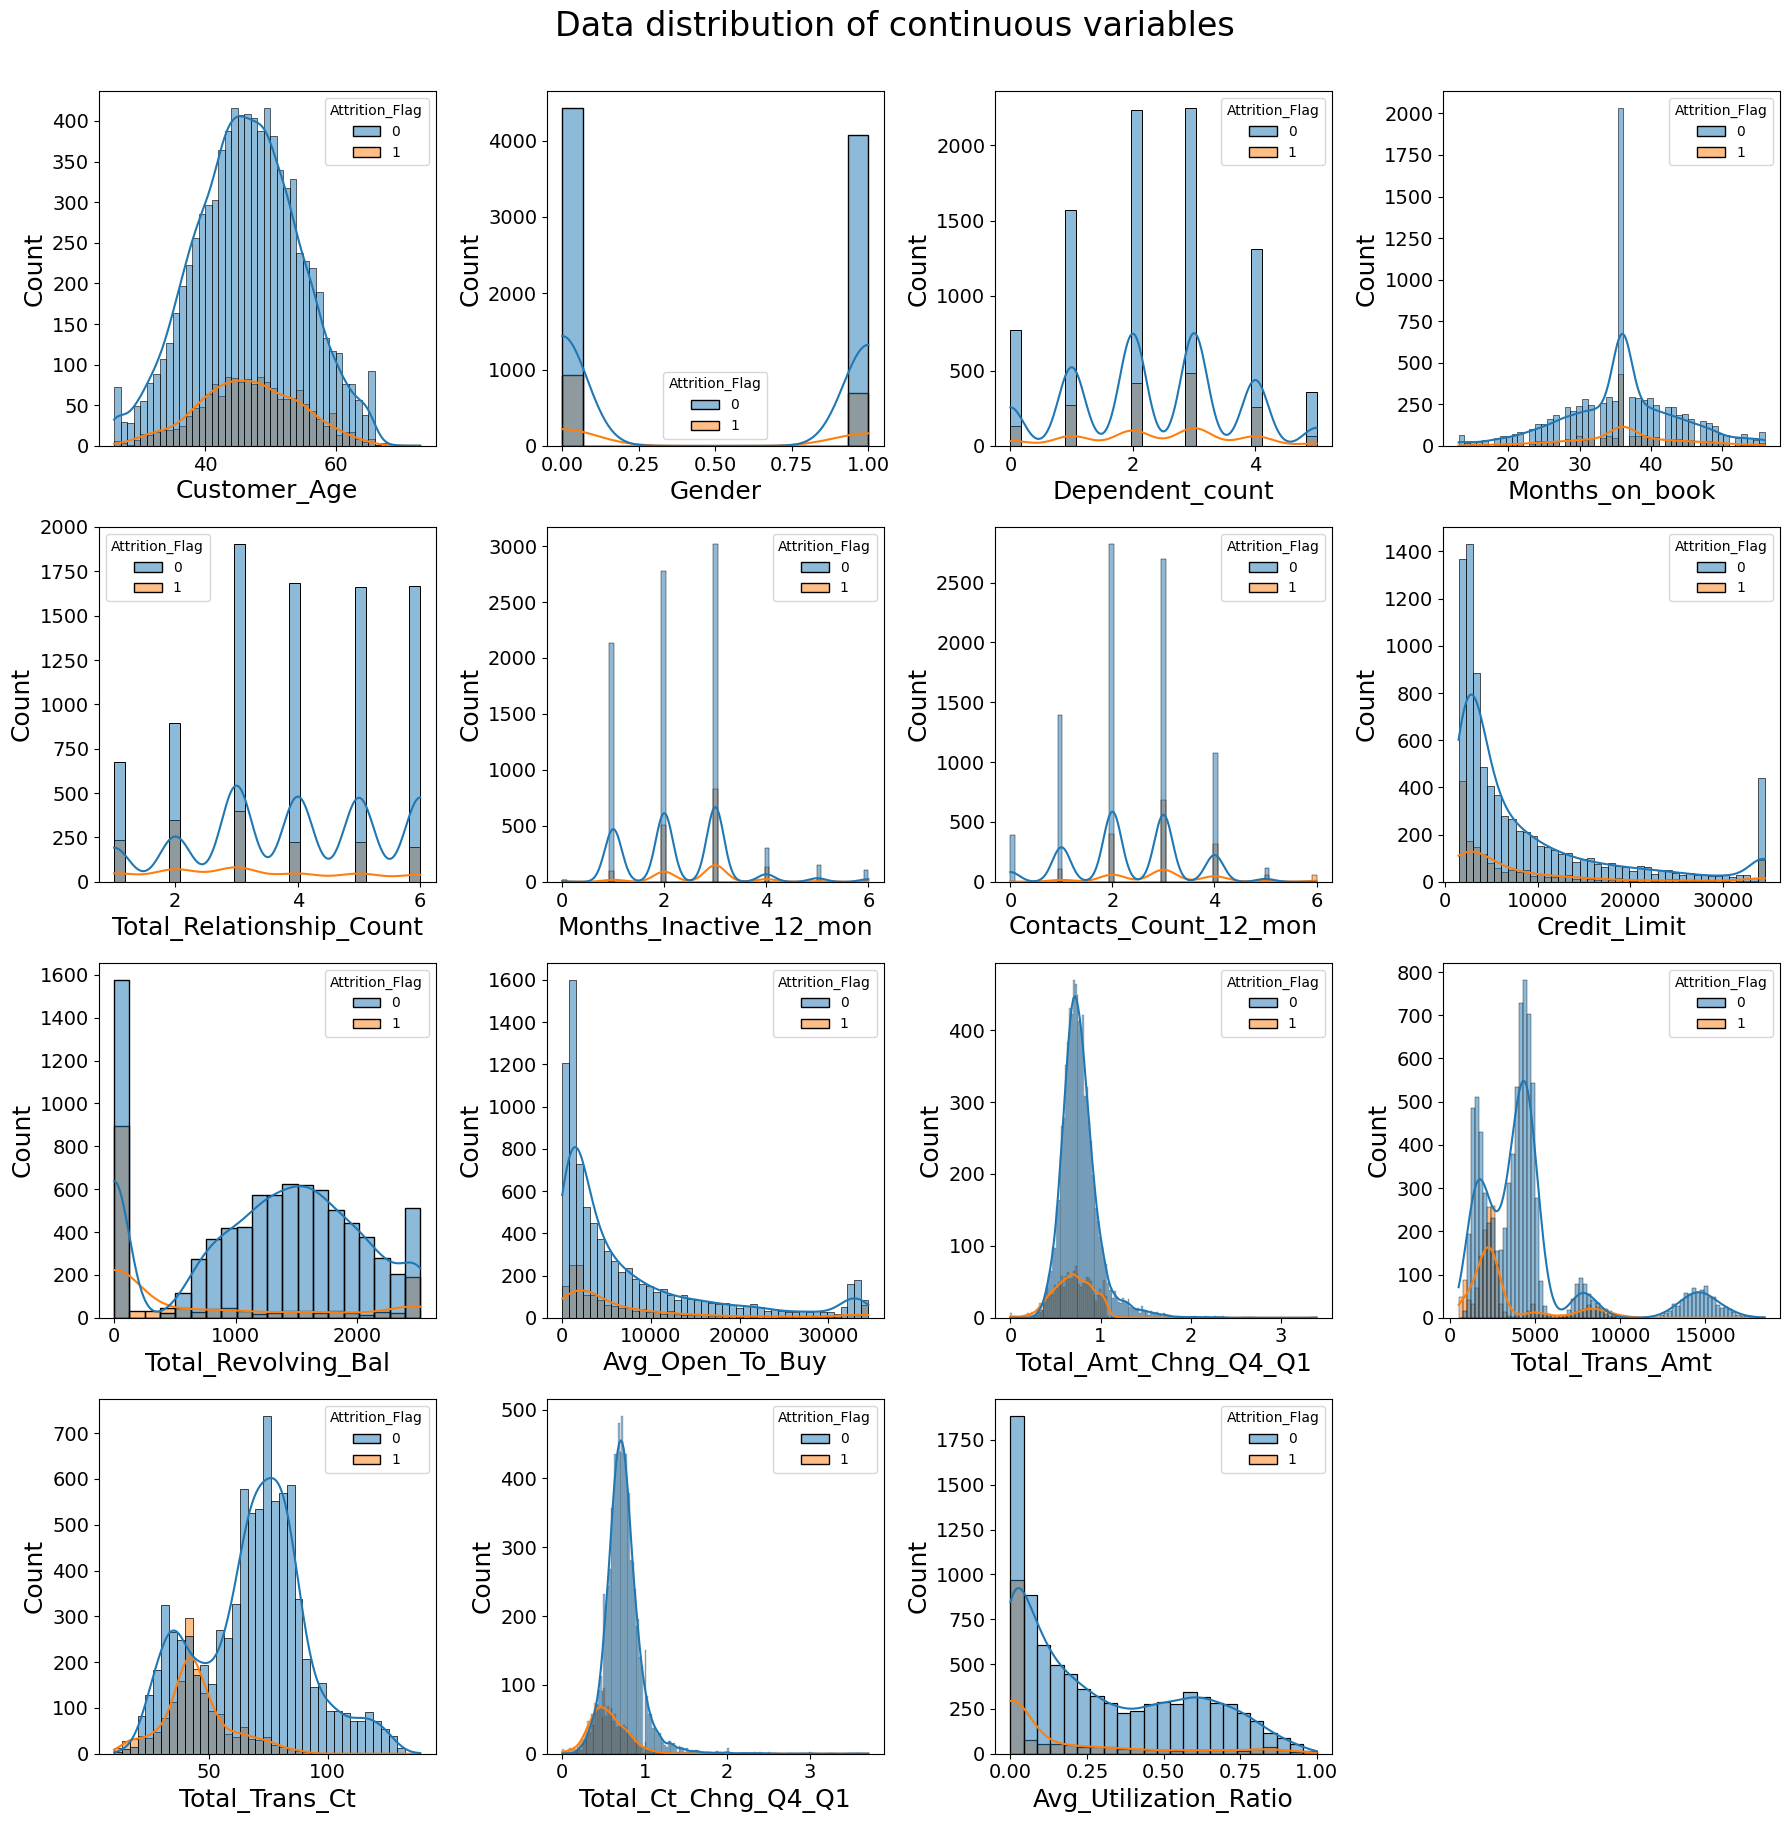

In [415]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('../cleaned_data/cleaned_data.csv')

display(data.describe())
display(data.head())


# Plotting histograms for numerical features
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.drop(['Attrition_Flag'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(4, 4, i+1)  # Creating a subplot for each column.
    sns.histplot(data=data, x=col, ax=ax, color='red', kde=True, hue='Attrition_Flag')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
plt.suptitle('Data distribution of continuous variables', fontsize=24, y=1.01)
plt.tight_layout()
plt.show()

- 'Total amount change' and 'Total count change' are both well below 1, indicating a clear decline in general usage. This could be the effect of increasing use of online payments.
- 'Months on book' shows a very high increase in new customers for one particular month. This might be becouse of a advertising campaign, but no significant abnormalities in this group.
- 'Total transaction amount' and 'Total transaction count': multiple peaks in the data could be further examined.

The churn rate is clearly higher for the 'small' users, being customers with low credit limit, and low usage, transaction count and transaction amount.

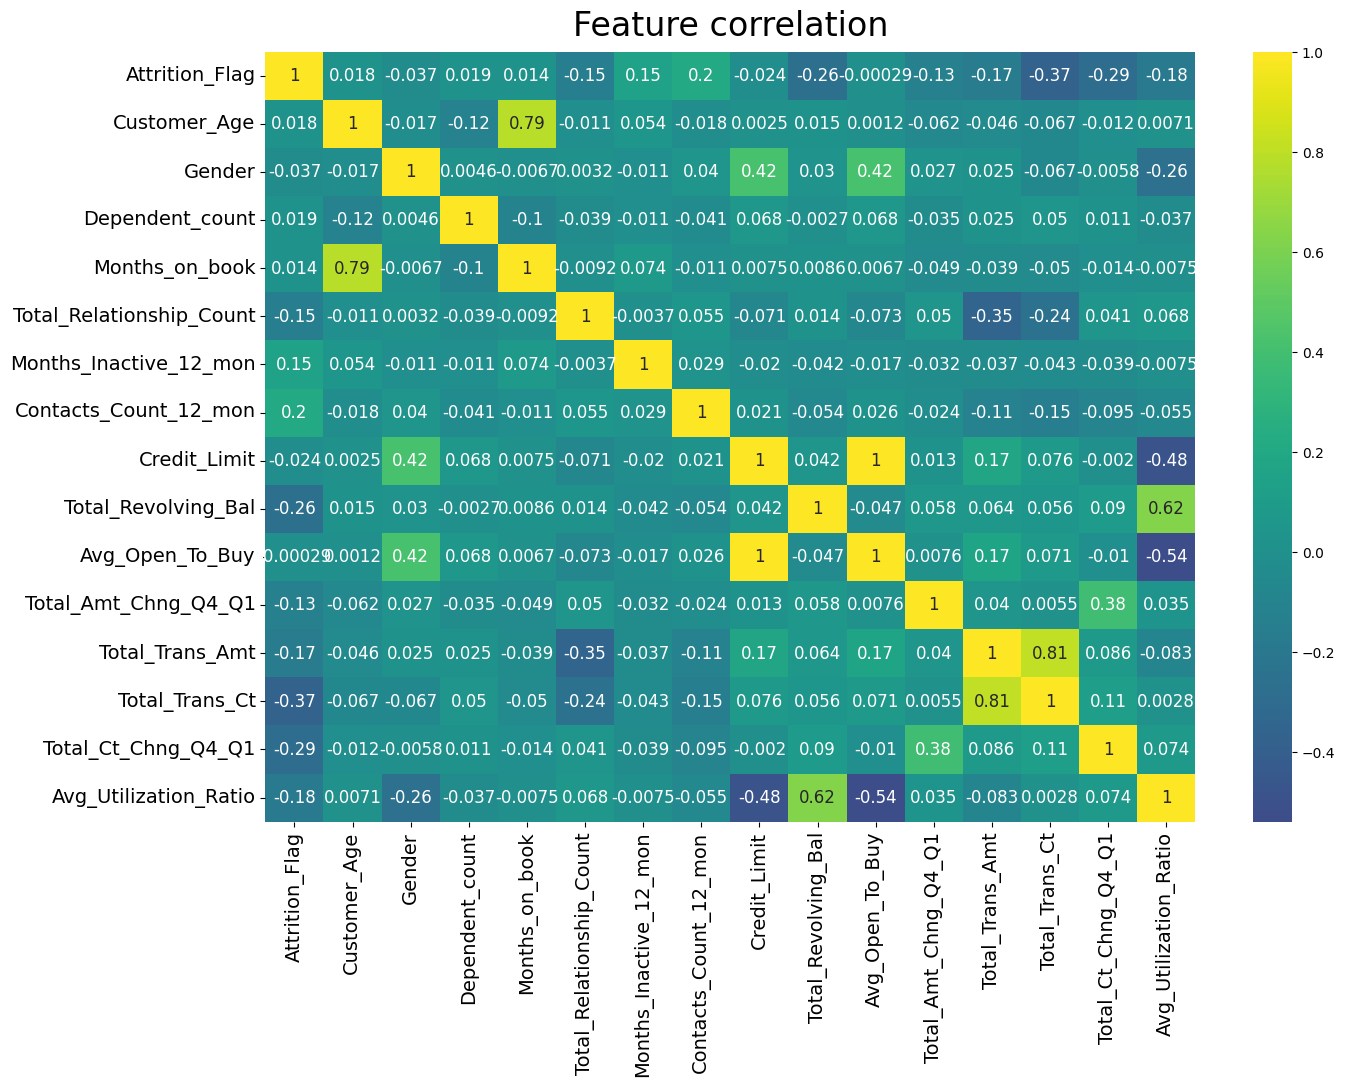

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1
0,0,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,1.625
1,0,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,3.714
2,0,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,2.333
3,0,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,2.333
4,0,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476,0.857
10123,1,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.804,8764,0.683
10124,1,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291,0.818
10125,1,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.535,8395,0.722


In [416]:
# Correlation between numerical features: heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Feature correlation",fontsize=24, y=1.01)
plt.show()

# Remove correlated features
data.drop(['Total_Trans_Ct', 'Customer_Age', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy'], axis=1)

There's a high correlation between 3 pairs of variables: 
- Total transaction amount & Total transaction count; 
- Months on book & Customer age; 
- Average utilisation ratio & Total revolving balance.

Additionally, AVG Open to buy & Credit limit seem to contain the same information.

As a result, we'll remove the columns 'Total_Trans_Ct', 'Customer_Age', 'Avg_Utilisation_Ratio', and 'Avg_Open_To_Buy'




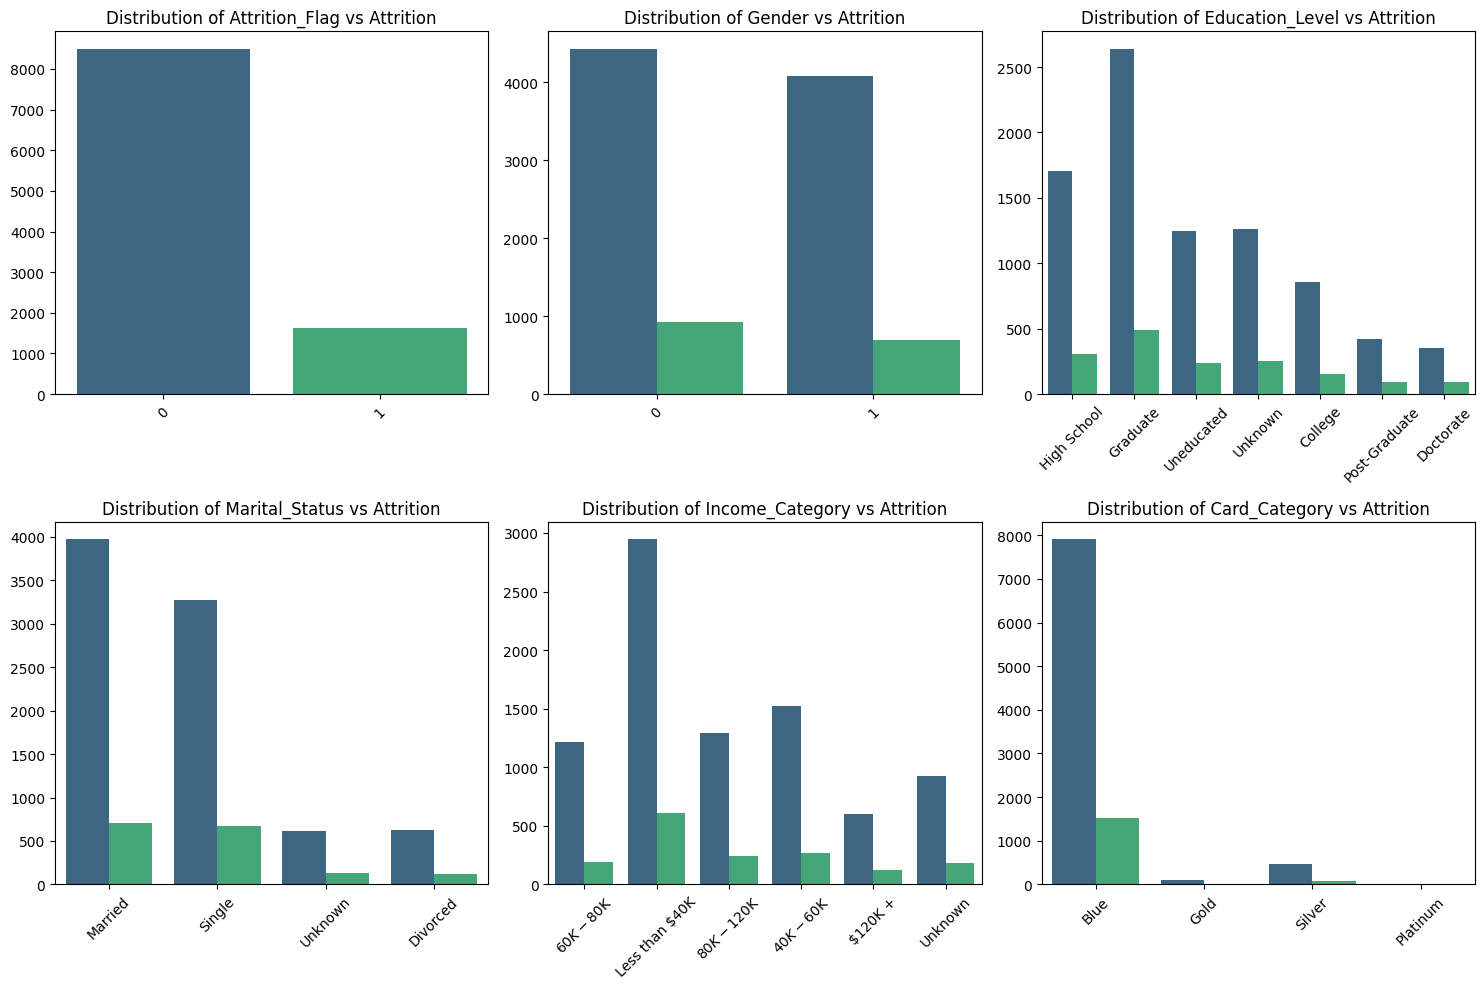

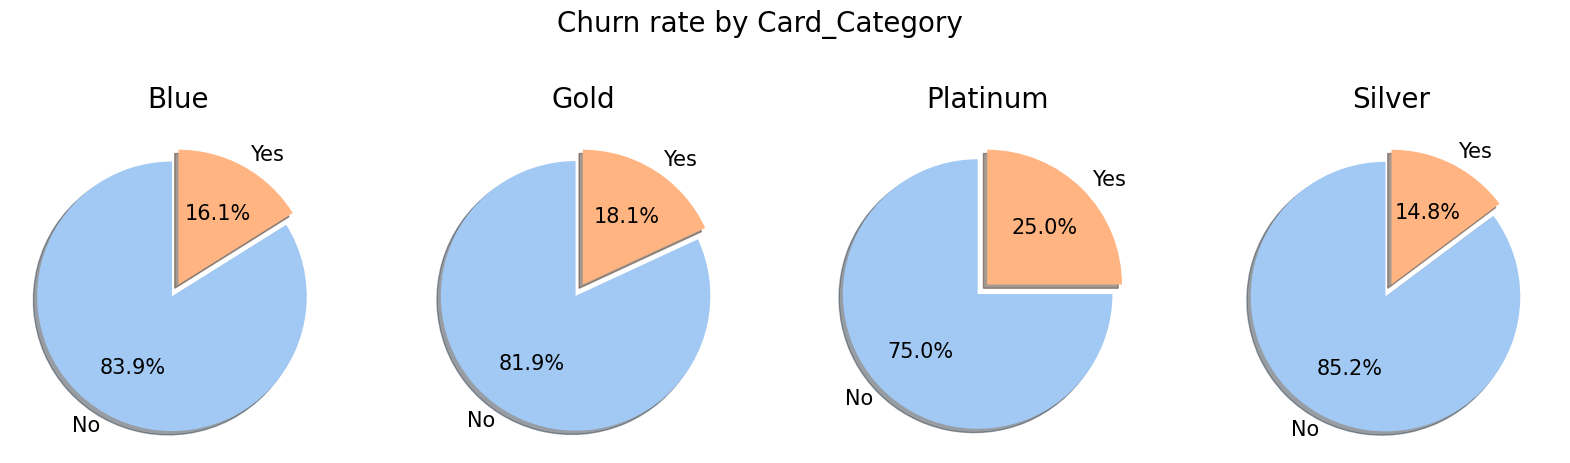

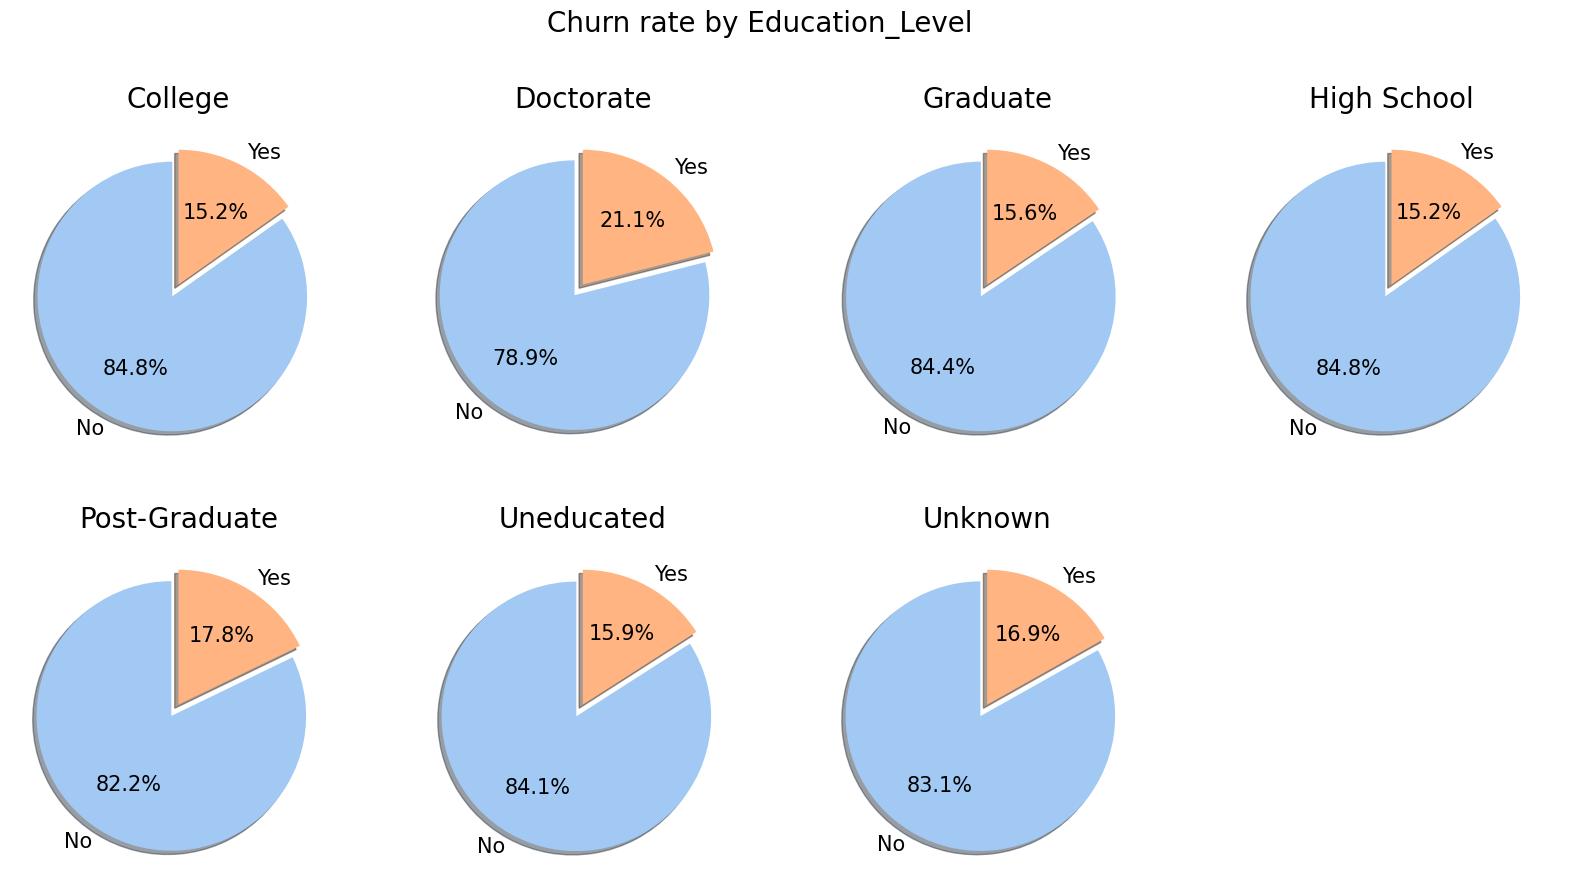

In [417]:
def plot_churn_by_feature(data, feature):
    """Plot pie charts for different features, showing churn rate.
    Input: data = DataFrame; feature = column to examine"""
    categories = data.groupby(feature)['Attrition_Flag'].value_counts(normalize=True).unstack(fill_value=0) * 100
    categories.columns = ['No_Percentage', 'Yes_Percentage']
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for i, (label, row) in enumerate(categories.iterrows()):
        ax = axes.flatten()[i]
        ax.pie(row, explode=(0.1, 0), labels=['No', 'Yes'], colors=sns.color_palette("pastel"),
               autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 15})
        ax.set_title(label, fontsize=20)

    for i in range(len(categories), axes.size): fig.delaxes(axes.flatten()[i])
    plt.suptitle(f'Churn rate by {feature}', fontsize=20)
    plt.show()


# Plot categorical features
columns_to_visualize = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=data, hue='Attrition_Flag', palette='viridis', legend=False)
    plt.title(f'Distribution of {column} vs Attrition')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


# Make pie charts for Card_Category and Education_Level, showing churn rate
plot_churn_by_feature(data, 'Card_Category')
plot_churn_by_feature(data, 'Education_Level')


# Encoding ordinal features
columns = ['Income_Category','Card_Category', 'Education_Level','Marital_Status']
for col in columns:
  data = pd.concat([data,pd.get_dummies(data[col], drop_first=True).astype(int)], axis=1)
data.drop(columns=columns, inplace=True)

- Although the absolute numbers are pretty low, the churn rate is significantly higher for 'Platinum' cards, indicating that the higher costs for this particular product might be a reason to discontinue it.
- When we look at 'Education level' we notice people who have a higher degree tend to leave easier.

Since Platinum cards are issued to customers with a higher income, and people with higher degrees tend to earn more, we can assume that we're talking about (partly) the same group of clients.

In [418]:
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Prepare and split data
X = data.drop(columns='Attrition_Flag').to_numpy()
y = data['Attrition_Flag'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Initialize the base models
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the models
models = [
    ('XGBoost', xgb_model),
    ('Random Forest', rf_model),
    ('Voting Classifier', VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], voting='soft'))
]

# Store the model evaluation results
model_comparison = {}

# Train and evaluate models, calculate results
for model_name, classifier in models:
    # Fit the model, and predict
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Cross-validation
    cross_val_accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="accuracy")
    cv_accuracy = cross_val_accuracy.mean()
    cv_std = cross_val_accuracy.std()
    # Accuracy
    accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
    accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])

    # Print metrics, and add to model_comparison
    print(f"Model: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
    print(f"Accuracy for Class 0: {accuracy_class_0 * 100:.2f}%")
    print(f"Accuracy for Class 1: {accuracy_class_1 * 100:.2f}%")
    model_comparison[model_name] = {'accuracy': accuracy, 'accuracy_class_0': accuracy_class_0,
        'accuracy_class_1': accuracy_class_1, 'f1_score': f1, 'cv_accuracy': cv_accuracy, 'cv_std': cv_std}
    
    # Print classification report
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 60)

Model: XGBoost
Model Accuracy: 96.41%
Model F1-Score: 96.40%
Cross Val Accuracy: 97.18%
Cross Val Standard Deviation: 0.33%
Accuracy for Class 0: 97.87%
Accuracy for Class 1: 89.02%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2113
           1       0.89      0.89      0.89       419

    accuracy                           0.96      2532
   macro avg       0.94      0.93      0.93      2532
weighted avg       0.96      0.96      0.96      2532

------------------------------------------------------------
Model: Random Forest
Model Accuracy: 95.10%
Model F1-Score: 94.90%
Cross Val Accuracy: 95.68%
Cross Val Standard Deviation: 0.46%
Accuracy for Class 0: 98.91%
Accuracy for Class 1: 75.89%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2113
           1       0.93      0.76      0.84       419

    accuracy                           0.95      2532
   macro avg       0.94 

In [419]:
# Model comparisson table

Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model F1-Score','Model Accuracy','Model Accuracy-0','Model Accuracy-1','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}")

,Model F1-Score,Model Accuracy,Model Accuracy-0,Model Accuracy-1,CV Accuracy,CV std
Voting Classifier,96.48%,98.30%,87.35%,96.46%,97.24%,0.33%
XGBoost,96.41%,97.87%,89.02%,96.40%,97.18%,0.33%
Random Forest,95.10%,98.91%,75.89%,94.90%,95.68%,0.46%
